<a href="https://colab.research.google.com/github/Danjstr/AIM-5001/blob/master/D_Strauss_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM 5001 Final Project

**Introduction**

Nasa has been observing space for the last several decades using ever more sophisticated space telescopes. They have used these telescopes to determine and confirm that other planets exist around other stars in our galaxy and beyond. One of these Space telescopes The Keplar Space Telescope has been instrumental in identifying many objects of interest outside our solar system. Many of these objects of Intrest have been confirmed planets by Nasa. This data can be hard to interoperate and with new planets popping up every so often it is hard to generate a real understanding of the process involved in identifying planets. Today we usually we get a NASA press release on page 37 of some odd journal claiming the discovery of a new planet. There is little in the way of public knowledge regarding the process of determining if an identified object is a planet and what the limits of the current technology are.

**Research Questions**

Question 1: I will be determining the basis by which Nasa determines when and how a planet has been confirmed as real by comparing the "Kepler Objects of Interest (KOI)" Table and "Confirmed Planets (Exoplanet)" Table.


Question 2: I will be determining the average mass of Kepler confirmed planets, as well as the mass of the smallest Keplar, confirmed planet. Then comparing it to the mass of the planets in our solar system to determine if the Keplar space telescope is biased to larger planets that are easier to see.


**Data to be Used**

The data used will come primarily from two different sources. The first "Kepler Objects of Interest (KOI)" Table and the second the "Confirmed Planets (Exoplanet)" Table.


The first Table "Kepler Objects of Interest (KOI)" will be provided as a csv. Information on this table can be found via the provided Kaggle link.

https://www.kaggle.com/nasa/kepler-exoplanet-search-results?select=cumulative.csv


The second Table the "Confirmed Planets (Exoplanet)" Table will be provided via the API using the instructions on the bellow webpage. 

https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html


Any data from our solar system used for comparison will be entered manually into the code as this is the easiest method to use when dealing with so few data points. Our solar system data will be based on relevant data from the following webpage. 

http://www.astromax.org/planets.htm



Reasech question 2:

Aproach: for reasech question 2: I will also be determining the mean and min of the mass of all planets discovered by Kepler to determine if the Telescope has trouble locating smaller objects and planets.  I will be using a box plot and histogram to determine the spread of the mass of the planets. This will be compared with the mass of objects in our solar system to determine the lower limit on the mass of planets Kepler can identify.

In [1]:
import pandas as pd

In [2]:
plan_dic={'Mercury':0.055274, 'Venus':0.815005, 'Earth':1,'Moon':0.0123,'Mars':0.107447,'Jupiter':317.833,'Saturn':95.159,'Uranus':14.5,'Neptune':17.204,'Pluto':0.0025}

In [3]:
print(plan_dic)

{'Mercury': 0.055274, 'Venus': 0.815005, 'Earth': 1, 'Moon': 0.0123, 'Mars': 0.107447, 'Jupiter': 317.833, 'Saturn': 95.159, 'Uranus': 14.5, 'Neptune': 17.204, 'Pluto': 0.0025}


In [4]:
df = pd.DataFrame([plan_dic])


In [5]:
df

,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,0.055274,0.815005,1,0.0123,0.107447,317.833,95.159,14.5,17.204,0.0025


The rest of our data and the onfirmed planet data is in Jupiter mass units. Whih means all our data bellow ounts with jupiters mass = 1. The table aboe has earth = 1. This means we will need to onert our table. and diide all it's alues by 317.833 to make sure we are working in the same units as our onfirmed planet table. This is to ensure there are no errors during later analyssi.

In [6]:
df=df/317.833
df

,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,0.000174,0.002564,0.003146,0.000039,0.000338,1.0,0.299399,0.045621,0.054129,0.000008


In [7]:
df=pd.DataFrame(df.unstack().reset_index())

In [8]:
df = df.rename(columns={0: "mass"})
df = df.rename(columns={"level_0": "Planets"})
df=df.drop(columns=['level_1'])
df

,Planets,mass
0,Mercury,0.000174
1,Venus,0.002564
2,Earth,0.003146
3,Moon,0.000039
4,Mars,0.000338
5,Jupiter,1.000000
6,Saturn,0.299399
7,Uranus,0.045621
8,Neptune,0.054129
9,Pluto,0.000008


Come back to figure out api request properly.

In [9]:
conf_plan = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&select=pl_name,pl_bmassj,pl_orbper"
#Read the data from mushroom into a dataframe and assign it the column names.


In [10]:
df2 = pd.read_csv(conf_plan)
df2.head()

,pl_name,pl_bmassj,pl_orbper
0,HD 177830 b,1.690,410.100010
1,HD 177830 c,0.150,110.900000
2,HD 178911 B b,8.030,71.484000
3,HD 179079 b,0.081,14.479000
4,HD 179949 b,0.916,3.092514


In [11]:
df2.shape

(4324, 3)

In [12]:
df2.dtypes

pl_name       object
pl_bmassj    float64
pl_orbper    float64
dtype: object

In [13]:
df2.describe()

,pl_bmassj,pl_orbper
count,1806.000000,4.180000e+03
mean,2.404317,2.060520e+03
std,4.371368,1.129482e+05
min,0.000060,9.070629e-02
25%,0.067413,4.465547e+00
50%,0.790000,1.176103e+01
75%,2.430000,4.169784e+01
max,55.590000,7.300000e+06


AS we an see from the information aboe the minimum mass reorded is 0.000060. This is relatiley omparable to the 0.000039 mass the moon, at just 30% more massie. This means the keeplar spae teleseope an loate planets that are just 30% larger than earths moon.

WE ould speulate that the smaller planets that were loated happened to be the ones that were loser to earth. THis howeer is outside the sope of our analysis.

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_name    4324 non-null   object 
 1   pl_bmassj  1806 non-null   float64
 2   pl_orbper  4180 non-null   float64
dtypes: float64(2), object(1)
memory usage: 101.5+ KB


(array([781., 261., 168., 107.,  91.,  53.,  38.,  33.,  23.,  20.,  24.,
         11.,  16.,  17.,  11.,  15.,  11.,  17.,  10.,  10.,   5.,   2.,
          7.,   7.,   7.,   8.,   4.,   2.,   6.,   2.,   4.,   0.,   2.,
          3.,   2.,   2.,   4.,   3.,   2.,   5.,   0.,   1.,   1.,   1.,
          2.,   0.,   0.,   0.,   3.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([6.00000000e-05, 5.55959400e-01, 1.11185880e+00, 1.66775820e+00,
        2.22365760e+00, 2.77955700e+00, 3.33545640e+00, 3.89135580e+00,
        4.44725520e+00, 5.00315460e+00, 5.55905400e+00, 6.11495340e+00,
        6.67085280e+00, 7.22675220e+00, 7.78265160e+00, 8.33855100e+00,
        8.89445040e+00, 9.4503

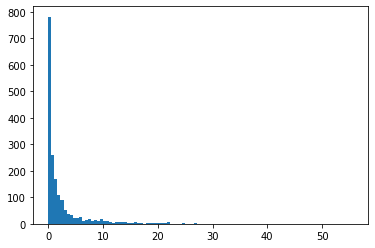

In [15]:
import matplotlib.pyplot as plt

plt.hist(df2['pl_bmassj'],bins=100)

Now we hae a clear problem. A serious problem. We have 4324 planets that have been confirmed that are named in dataframe, howeer we hae less than half that data for our masses. The simplest solution is to drop all the planets with no reorded mass. 
We an not fill our missing alues with the min or the maimum as this will skew th data dispraportinatley. Nor an we fill with the mean as we are not looking at a bell ure. filling with the mean would gie us an enourmous amount of data at a speifi point. The easist way to maintain the distribution of the data for omparison later with the planets of our solar system is to use foreward or baward fill. 

In [16]:
df2=df2.ffill(axis = 0)
df2

,pl_name,pl_bmassj,pl_orbper
0,HD 177830 b,1.69000,410.100010
1,HD 177830 c,0.15000,110.900000
2,HD 178911 B b,8.03000,71.484000
3,HD 179079 b,0.08100,14.479000
4,HD 179949 b,0.91600,3.092514
...,...,...,...
4319,HR 858 b,13.00000,3.585990
4320,HR 858 c,13.00000,5.972930
4321,HR 858 d,13.00000,11.230000
4322,K2-146 c,0.02358,4.004980


The distribution of the data has remained larley intat. Whih means our ffill met it's purpose.

(array([2.06e+03, 5.30e+02, 4.37e+02, 2.33e+02, 2.23e+02, 7.80e+01,
        1.80e+02, 8.80e+01, 2.50e+01, 8.00e+01, 2.40e+01, 1.20e+01,
        2.60e+01, 2.20e+01, 2.90e+01, 1.01e+02, 1.10e+01, 2.00e+01,
        2.90e+01, 1.00e+01, 5.00e+00, 2.00e+00, 7.00e+00, 1.30e+01,
        1.20e+01, 1.00e+01, 4.00e+00, 2.00e+00, 7.00e+00, 2.00e+00,
        4.00e+00, 0.00e+00, 2.00e+00, 3.00e+00, 2.00e+00, 3.00e+00,
        4.00e+00, 3.00e+00, 2.00e+00, 5.00e+00, 0.00e+00, 1.00e+00,
        3.00e+00, 1.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        3.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

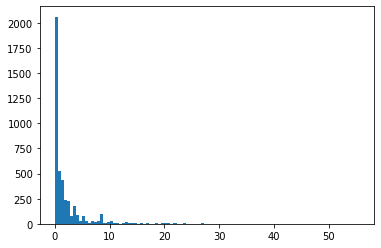

In [17]:
plt.hist(df2['pl_bmassj'],bins=100)

(array([8., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([7.86576598e-06, 1.00007079e-01, 2.00006293e-01, 3.00005506e-01,
        4.00004719e-01, 5.00003933e-01, 6.00003146e-01, 7.00002360e-01,
        8.00001573e-01, 9.00000787e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

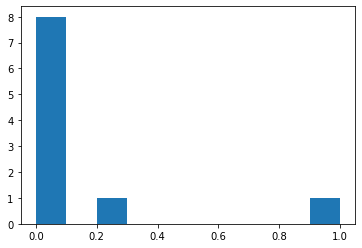

In [18]:
plt.hist(df['mass'],bins=10)

In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


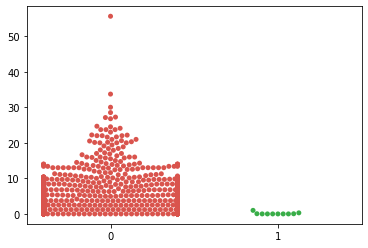

In [21]:
sns.swarmplot(
    data=[df2['pl_bmassj'], df['mass']],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]])



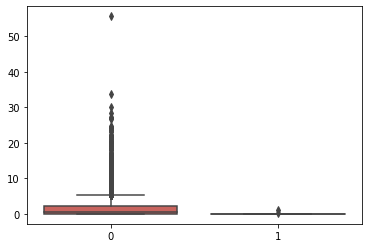

In [22]:
sns.boxplot(
    data=[df2['pl_bmassj'], df['mass']],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]])



Reserh question 2:

**Approach**

Aproach: For reasech question 1:  I will be trying to determine if there is any positive correlation between the two tables to see if there are any data points in the two tables that may provide insight as to how and Why Nasa determines that a KOI object is a planet.  I will use beeswarm plots to visualize the statistical differences between ordinary KOI objects and confirmed planets. For the feature we did not cover in class, I will use linear regressors from the sci-kit learn to help better predict the relationship between these variables. I will also be doing train test split so that my linear regressor can be verified on a test sample of the data. 



In [23]:
import pandas as pd


In [24]:
Obj_intrest = "https://raw.githubusercontent.com/Danjstr/AIM-5001/master/cumulative.csv"
#Read the data from mushroom into a dataframe and assign it the column names.
df1 = pd.read_csv(Obj_intrest)
df1.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [25]:
df1

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,NaN,NaN,176.40,152.77,-77.60,8.4,1.0,q1_q17_dr25_tce,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12

In [26]:
df1.info

<bound method DataFrame.info of       rowid     kepid kepoi_name  ...         ra        dec koi_kepmag
0         1  10797460  K00752.01  ...  291.93423  48.141651     15.347
1         2  10797460  K00752.02  ...  291.93423  48.141651     15.347
2         3  10811496  K00753.01  ...  297.00482  48.134129     15.436
3         4  10848459  K00754.01  ...  285.53461  48.285210     15.597
4         5  10854555  K00755.01  ...  288.75488  48.226200     15.509
...     ...       ...        ...  ...        ...        ...        ...
9559   9560  10031643  K07984.01  ...  298.74921  46.973351     14.478
9560   9561  10090151  K07985.01  ...  297.18875  47.093819     14.082
9561   9562  10128825  K07986.01  ...  286.50937  47.163219     14.757
9562   9563  10147276  K07987.01  ...  294.16489  47.176281     15.385
9563   9564  10156110  K07989.01  ...  297.00977  47.121021     14.826

[9564 rows x 50 columns]>

In [27]:
df1.dtypes

rowid                  int64
kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2

In [28]:
df3=df1.drop(columns=['koi_tce_delivname','koi_pdisposition','rowid', 'kepid','kepoi_name' ])

In [29]:
df3

,kepler_name,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,Kepler-227 b,CONFIRMED,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,Kepler-227 c,CONFIRMED,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,NaN,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,NaN,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,Kepler-664 b,CONFIRMED,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,NaN,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,NaN,NaN,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,NaN,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,NaN,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,NaN,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [31]:
df4=df3.drop(df3.columns.difference(['kepler_name','koi_disposition','koi_period']), 1, inplace=False)

In [32]:
df4

,kepler_name,koi_disposition,koi_period
0,Kepler-227 b,CONFIRMED,9.488036
1,Kepler-227 c,CONFIRMED,54.418383
2,NaN,FALSE POSITIVE,19.899140
3,NaN,FALSE POSITIVE,1.736952
4,Kepler-664 b,CONFIRMED,2.525592
...,...,...,...
9559,NaN,FALSE POSITIVE,8.589871
9560,NaN,FALSE POSITIVE,0.527699
9561,NaN,CANDIDATE,1.739849
9562,NaN,FALSE POSITIVE,0.681402


In [33]:
df4.shape

(9564, 3)

In [35]:
df4.dtypes

kepler_name         object
koi_disposition     object
koi_period         float64
dtype: object

In [34]:
df4.describe()

,koi_period
count,9564.000000
mean,75.671358
std,1334.744046
min,0.241843
25%,2.733684
50%,9.752831
75%,40.715178
max,129995.778400


In [36]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kepler_name      2294 non-null   object 
 1   koi_disposition  9564 non-null   object 
 2   koi_period       9564 non-null   float64
dtypes: float64(1), object(2)
memory usage: 224.3+ KB


In [37]:
df5=df4[df4.koi_disposition != 'CONFIRMED']

df5

,kepler_name,koi_disposition,koi_period
2,NaN,FALSE POSITIVE,19.899140
3,NaN,FALSE POSITIVE,1.736952
8,NaN,FALSE POSITIVE,7.361790
14,NaN,FALSE POSITIVE,11.521446
15,NaN,FALSE POSITIVE,19.403938
...,...,...,...
9559,NaN,FALSE POSITIVE,8.589871
9560,NaN,FALSE POSITIVE,0.527699
9561,NaN,CANDIDATE,1.739849
9562,NaN,FALSE POSITIVE,0.681402


In [38]:
df5=df5.drop(columns=['kepler_name','koi_disposition'])

df5

,koi_period
2,19.899140
3,1.736952
8,7.361790
14,11.521446
15,19.403938
...,...
9559,8.589871
9560,0.527699
9561,1.739849
9562,0.681402


In [39]:
df5=df5.reset_index(drop=True)
df5

,koi_period
0,19.899140
1,1.736952
2,7.361790
3,11.521446
4,19.403938
...,...
7266,8.589871
7267,0.527699
7268,1.739849
7269,0.681402


In [40]:
df5.info

<bound method DataFrame.info of       koi_period
0      19.899140
1       1.736952
2       7.361790
3      11.521446
4      19.403938
...          ...
7266    8.589871
7267    0.527699
7268    1.739849
7269    0.681402
7270    4.856035

[7271 rows x 1 columns]>

In [41]:
df5.describe()

,koi_period
count,7271.000000
mean,91.000541
std,1530.212405
min,0.241843
25%,2.151300
50%,8.780604
75%,53.987056
max,129995.778400


In [42]:
df6=df2.drop(columns=['pl_name',	'pl_bmassj'])

df6

,pl_orbper
0,410.100010
1,110.900000
2,71.484000
3,14.479000
4,3.092514
...,...
4319,3.585990
4320,5.972930
4321,11.230000
4322,4.004980


In [45]:
df9=df6.reindex(df6.index.tolist() + list(range(2947)))
df9

,pl_orbper
0,4.101000e+02
1,1.109000e+02
2,7.148400e+01
3,1.447900e+01
4,3.092514e+00
...,...
2942,1.689868e+00
2943,3.979100e+00
2944,3.677240e+00
2945,7.300000e+06


In [46]:
df9.isnull().value_counts()

pl_orbper
False        7271
dtype: int64

In [47]:
from sklearn.utils import shuffle
df9 = shuffle(df9)
df9

,pl_orbper
3230,3.577469
2246,52.758756
3343,15.368459
394,123.010000
2145,14.034915
...,...
1351,2.131947
868,9.376470
2044,18.302725
832,10.222157


In [48]:
df9=df9.reset_index(drop=True)
df9

,pl_orbper
0,3.577469
1,52.758756
2,15.368459
3,123.010000
4,14.034915
...,...
7266,2.131947
7267,9.376470
7268,18.302725
7269,10.222157


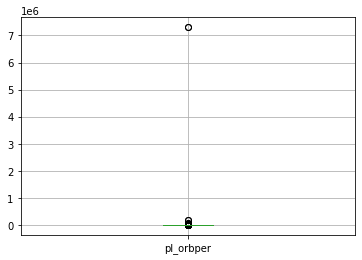

In [49]:
df9.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3f0b01668>]],
      dtype=object)

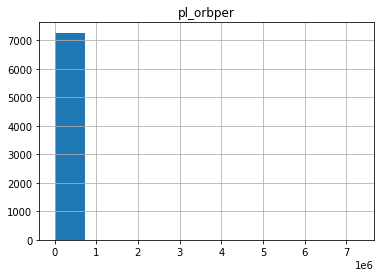

In [50]:
df9.hist()

In [51]:
df9.max()

pl_orbper    7300000.0
dtype: float64

In [52]:
df10 = df9[df9.pl_orbper <= 7300000.0]
df10

,pl_orbper
0,3.577469
1,52.758756
2,15.368459
3,123.010000
4,14.034915
...,...
7266,2.131947
7267,9.376470
7268,18.302725
7269,10.222157


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3f0a13ba8>]],
      dtype=object)

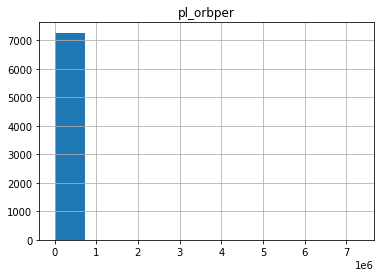

In [53]:
df10.hist()

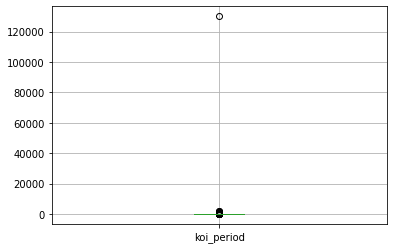

In [54]:
df5.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3f0985978>]],
      dtype=object)

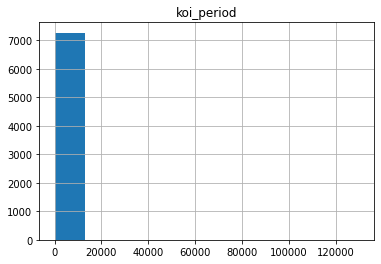

In [55]:
df5.hist()

In [56]:
df5.max()

koi_period    129995.7784
dtype: float64

In [57]:
df10_array=df10.to_numpy()

In [58]:
df5_array=df5.to_numpy()

In [59]:
#import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
#import train test split from sklearn
from sklearn.model_selection import train_test_split
#import metrics from sklearn
from sklearn import metrics
#import cross_val_score from sklearn
from sklearn.model_selection import cross_val_score

Create a train test split of the Odor dummies and the poisoned column.

In [60]:
#Create a train test split of the odor dummies
x_train,x_test,y_train,y_test = train_test_split(df5_array, df10_array, random_state=1)

Create a model for the oder data and make it a logistic regression. Fit the model on our training data and run it.

In [61]:
#Create the variable o_model for the odor data and make it a logistic regression model
model = LinearRegression()


In [62]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)


In [63]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

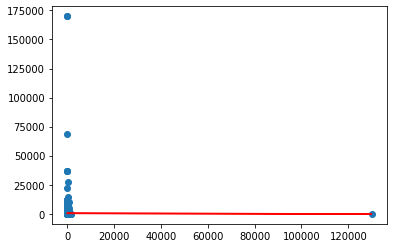

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train, color='red')

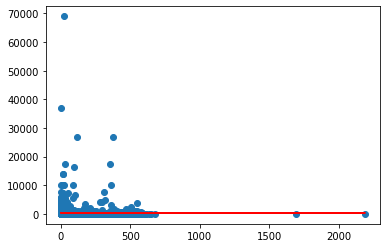

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test, color='red')

View the accuracy of our training data and test data for our odor model.

Our training data indicates that it can correctly tell what mushrooms are poisonous 98.6 % of the time. While our test data indicates that we are right 98.2% of the time.



Now we have bothe our datframes imported properly. The problem is that they are both quite expansive daframes with one of them has 50 columns the other has 84 columns. So the first thing we will have to do is develop some domain knowladge to determine which of these columns have value for our analysis. 

The URL's provided belllow are links to NASA's keepplar mission page, a link to an overview of the keplar objects of intrest dataframe, as well as a link to an overvies of the confirmed planets datframe.

https://www.nasa.gov/mission_pages/kepler/overview/index.html

https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html

I sould not the relationship between the two table is quite simple. Anything that is in the Objets of intrest table with a KOI_disposition of onfirmed are in the onfirmed palnets table as well. This means we an usse the orrelation between all the olumns in the objets of intrest table when ompared with the Koi disposition olumn to determine wih metris ontributed to the deision that they were i n fat onfirmeds planets.

AS suh we will begin by narrowing down our onfirmed planets only to the essential olumns needed for our anaysis. We will be fousing on the mass, density and radius of onfirmed planets. This data will be omapred with data from planets in our own solar syastem. 

I should note that this is foolish as we only hae 8 alid data points (planets in our solar system) to make the omparison on. WE are makeing an assumption right of the bat that our sollar system is the norm and that on aerage oter solar sytems wil hae planets that are the same mass as ours. Thius is howeer an unaoidabel assumption.

In [100]:
df11 = df9[df9.pl_orbper <= 2000.0]
df11

,pl_orbper
0,3.577469
1,52.758756
2,15.368459
3,123.010000
4,14.034915
...,...
7266,2.131947
7267,9.376470
7268,18.302725
7269,10.222157


In [101]:
df12 = df5[df5.koi_period <= 2000.0]
df12

,koi_period
0,19.899140
1,1.736952
2,7.361790
3,11.521446
4,19.403938
...,...
7266,8.589871
7267,0.527699
7268,1.739849
7269,0.681402


In [102]:
df12.max()

koi_period    1693.663622
dtype: float64

In [103]:
df13 = df12.iloc[253:]
df13

,koi_period
254,8.387210
255,15.238454
256,0.413334
257,0.933746
258,6.471793
...,...
7266,8.589871
7267,0.527699
7268,1.739849
7269,0.681402


In [104]:
df13.reset_index()

,index,koi_period
0,254,8.387210
1,255,15.238454
2,256,0.413334
3,257,0.933746
4,258,6.471793
...,...,...
7011,7266,8.589871
7012,7267,0.527699
7013,7268,1.739849
7014,7269,0.681402


In [105]:
df11.reset_index()

,index,pl_orbper
0,0,3.577469
1,1,52.758756
2,2,15.368459
3,3,123.010000
4,4,14.034915
...,...,...
7011,7266,2.131947
7012,7267,9.376470
7013,7268,18.302725
7014,7269,10.222157


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3ebb625f8>]],
      dtype=object)

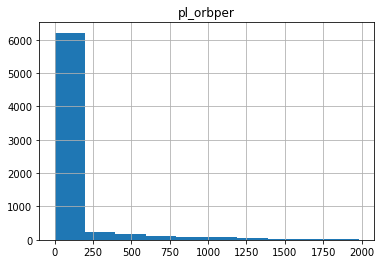

In [106]:
df11.hist()

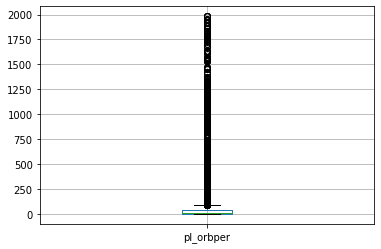

In [107]:
df11.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3ebac22b0>]],
      dtype=object)

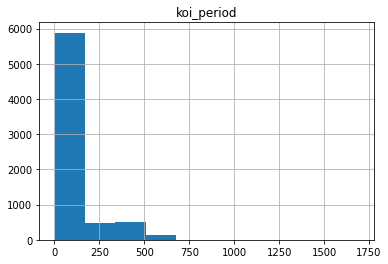

In [108]:
df13.hist()

In [109]:
df13.max()

koi_period    1693.663622
dtype: float64

In [110]:
df13_array=df13.to_numpy()

In [111]:
df11_array=df11.to_numpy()

Create a train test split of the Odor dummies and the poisoned column.

In [112]:
#Create a train test split of the odor dummies
x_train,x_test,y_train,y_test = train_test_split(df11_array, df13_array, random_state=1)

Create a model for the oder data and make it a logistic regression. Fit the model on our training data and run it.

In [113]:
#Create the variable o_model for the odor data and make it a logistic regression model
model = LinearRegression()


In [114]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)


In [115]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

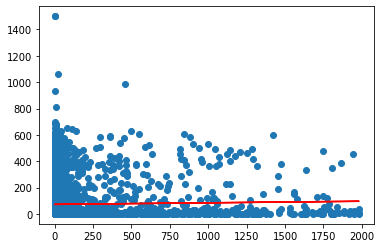

In [117]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train, color='red')

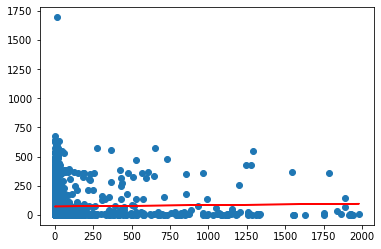

In [118]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test, color='red')